In [17]:
import pandas as pd
import numpy as np

In [36]:
# files path
path1 = r"C:\Users\Zakaria-Laptop\LLM-Models\NLP_TFIDF\DataBase\S08_question_answer_pairs.txt"
path2 = r"C:\Users\Zakaria-Laptop\LLM-Models\NLP_TFIDF\DataBase\S09_question_answer_pairs.txt"
path3 = r"C:\Users\Zakaria-Laptop\LLM-Models\NLP_TFIDF\DataBase\S10_question_answer_pairs.txt"

In [37]:
def read_file(path: str) -> pd.DataFrame:
    """_summary_

    Args:
        path (str): _description_

    Returns:
        pd.DataFrame: _description_
    """    
    return pd.read_csv(path, sep="	")

data1 = read_file(path1)
data2 = read_file(path2)
# It's a file encoded with ISO
data3 = pd.read_csv(path3, sep="\t", encoding='ISO-8859-1')


In [38]:
# Contôler si on a les mêmes nomenclature des colonnes
def controle_columns(df1, df2, df3):
    return list(df1.columns) == list(df2.columns) == list(df3.columns)
controle_columns(data1, data2, data3)

True

In [39]:
# Precrocessing
data = pd.concat([data1, data2, data3])
data = data[["Question", "Answer"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 0 to 1457
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  3961 non-null   object
 1   Answer    3420 non-null   object
dtypes: object(2)
memory usage: 93.7+ KB


In [40]:
# Remove duplicate
data = data.drop_duplicates(subset="Question")
# Drop nan
data = data.dropna()

print("le nombre des nans est :", data.isna().sum())
print("le nombre de duplicates est: ", data.duplicated().sum())

le nombre des nans est : Question    0
Answer      0
dtype: int64
le nombre de duplicates est:  0


In [41]:
data.shape

(2183, 2)

In [60]:
data.head(2)

,Question,Answer
0,Was Abraham Lincoln the sixteenth President of...,yes
2,Did Lincoln sign the National Banking Act of 1...,yes


In [61]:
!pip install --upgrade nltk

In [44]:
# Import necessary labrairies for tf-idf
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
import nltk

# Check for stopwords
try:
    nltk.data.find('corpora/stopwords.zip')
    print("Stopwords corpus is available.")
except LookupError:
    print("Stopwords corpus is NOT available. Please download it.")

# Check for punkt tokenizer
try:
    nltk.data.find('tokenizers/punkt.zip')
    print("Punkt tokenizer is available.")
except LookupError:
    print("Punkt tokenizer is NOT available. Please download it.")


Stopwords corpus is available.
Punkt tokenizer is available.


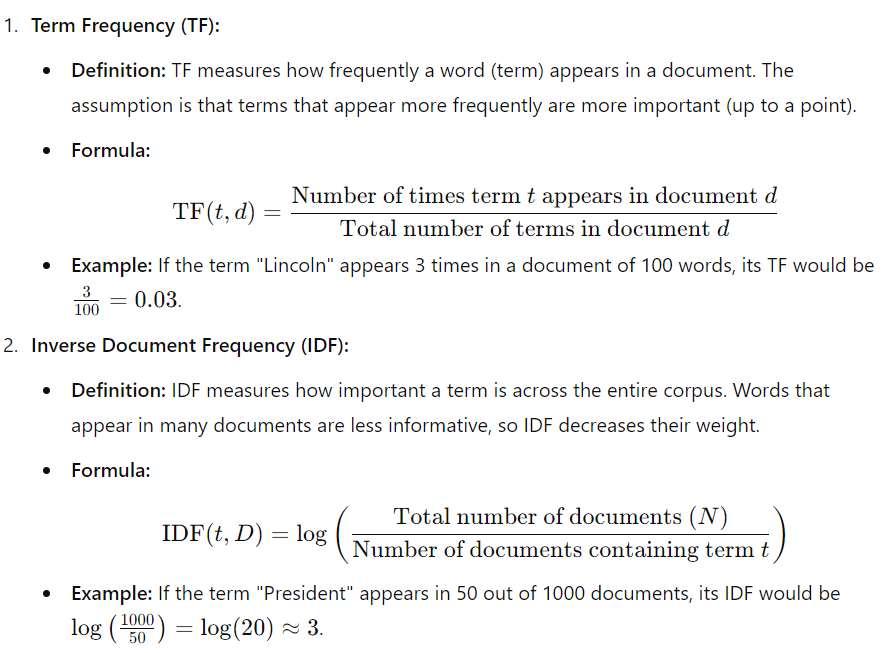

In [45]:
#nltk.download('stopwords')
stopwords_list = stopwords.words("english")

# (lemmatization): Used to convert words to their base or root form.
lemmatizer = WordNetLemmatizer()

#nltk.download('punkt')

def my_tokenizer(doc):
    words = word_tokenize(doc)
    pos_tags = pos_tag(words)

    non_stopwords = [elm for elm in pos_tags if not elm[0].lower() in stopwords_list]
    non_punctuation = [elm for elm in non_stopwords if not elm[0] in string.punctuation]

    """
    'J' indicates that the word is an adjective.
    'V' indicates its a verb.
    'N' for noun.
    'R' indicates an adverb.
    """
    lemmas = []

    for w in non_punctuation:
        if w[1].startswith('J'):
            pos = wordnet.ADJ
        if w[1].startswith('V'):
            pos = wordnet.VERB
        if w[1].startswith('N'):
            pos = wordnet.NOUN
        if w[1].startswith('R'):
            pos = wordnet.ADV
        else:
            pos = wordnet.NOUN

        lemmas.append(lemmatizer.lemmatize(w[0], pos))
    return lemmas

In [76]:
data["Question"].iloc[1]

'Did Lincoln sign the National Banking Act of 1863?'

### 5 - Train the model

In [34]:
import nltk
nltk.download('stopwords')  # For stopwords
nltk.download('punkt')  # For tokenization
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # Optional: for extended WordNet resources

[nltk_data] Downloading package stopwords to C:\Users\Zakaria-
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zakaria-
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zakaria-Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Zakaria-
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Zakaria-
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Question']) # Transforms the documents into TF-IDF feature vectors based on the learned vocabulary.
print(tfidf_matrix.shape)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Zakaria-Laptop/nltk_data'
    - 'c:\\Users\\Zakaria-Laptop\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Zakaria-Laptop\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Zakaria-Laptop\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Zakaria-Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [11]:
sep = "-".join("" for x in range(50))
print(f"{sep} to be continued {sep}")

------------------------------------------------- to be continued -------------------------------------------------
